In [71]:
import pandas as pd
import numpy as np

In [72]:
measures = pd.read_csv('measures.csv').set_index('cdtfa_id')

In [73]:
measures

,ballot_designation,county_fips,county_name,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,year
cdtfa_id,,,,,,,,,,,,
377,Measure BB,6001,Alameda,0.01000,0.4800,0.2381,0.1400,NaN,0.3000,0.0900,NaN,2014.0
24,Measure J,6013,Contra Costa,0.00500,0.3270,0.1880,0.1390,NaN,0.2550,26.4000,6.900,2004.0
12,Measure C Extension,6019,Fresno,0.00500,0.3200,NaN,0.0600,0.3460,0.2940,NaN,NaN,2007.0
29,Measure D,6025,Imperial,0.00500,0.0200,NaN,NaN,NaN,0.0500,0.9300,NaN,2008.0
5,Proposition A,6037,Los Angeles,0.00500,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,1980.0
35,Proposition C,6037,Los Angeles,0.00500,0.5500,NaN,NaN,0.2000,0.2500,NaN,NaN,1990.0
217,Measure R,6037,Los Angeles,0.00500,0.6500,0.2500,0.4000,0.1500,0.2000,NaN,NaN,2008.0
576,Measure M,6037,Los Angeles,0.00500,0.6500,0.2700,0.3800,0.1600,0.1700,0.0200,NaN,2016.0
144,T,6039,Madera,0.00500,0.0200,NaN,NaN,0.2175,NaN,0.2175,0.510,2006.0


### Amount of transit funding varies greatly between LOST measures

In [74]:
measures['total_pct_transit'].mean()

0.33239

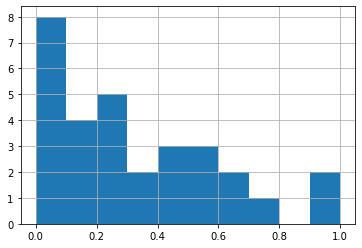

In [75]:
measures['total_pct_transit'].hist();

### LOST measures seem to fund transit operations more than capital, but data incomplete

In [76]:
measures['pct_transit_ops'].mean()

0.24908125

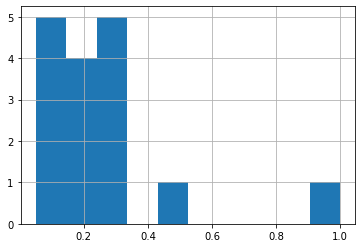

In [77]:
measures['pct_transit_ops'].hist();

In [78]:
measures['pct_transit_capital'].mean()

0.15301818181818183

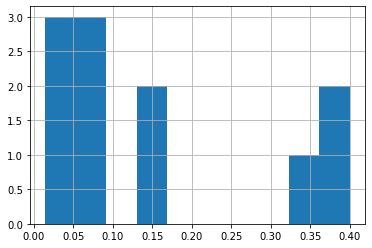

In [79]:
measures['pct_transit_capital'].hist();

### Quick funding example using CDTFA data

In [80]:
cdtfa = pd.read_csv('LRBQtrDistDistrictTax.csv').set_index('Jurisdiction Id')

In [81]:
measures_joined = (cdtfa[cdtfa['Calendar Year'] == 2020]
                   .join(measures, how='inner')
                  )

In [82]:
santa_cruz = measures_joined.loc[547]
santa_cruz

,Calendar Year,Quarter,Acronym,Jurisdiction,Gross,Prior Advance,Administrative Cost,Net Amount,ballot_designation,county_fips,county_name,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,year
547,2020,3,SCZT,Santa Cruz County Transportation T,6087469.20,4508873.82,46270.0,1532325.38,Measure D,6087,Santa Cruz,0.005,0.28,0.2,0.08,0.3,0.25,0.17,NaN,2016.0
547,2020,2,SCZT,Santa Cruz County Transportation T,5505234.71,3714774.17,46270.0,1744190.54,Measure D,6087,Santa Cruz,0.005,0.28,0.2,0.08,0.3,0.25,0.17,NaN,2016.0
547,2020,1,SCZT,Santa Cruz County Transportation T,3989160.63,3066397.14,48400.0,874363.49,Measure D,6087,Santa Cruz,0.005,0.28,0.2,0.08,0.3,0.25,0.17,NaN,2016.0


In [83]:
santa_cruz['Transit Operations Funding'] = santa_cruz['Net Amount'] * santa_cruz['pct_transit_ops']

<ipython-input-83-ac1c81f361b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santa_cruz['Transit Operations Funding'] = santa_cruz['Net Amount'] * santa_cruz['pct_transit_ops']


### Estimate of 2020 Quarterly Transit Operations funding from Santa Cruz's Measure D

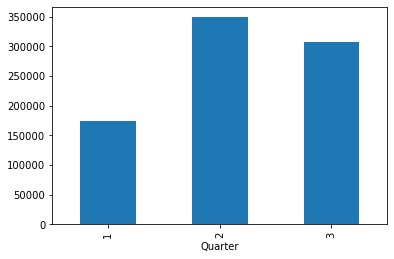

In [84]:
santa_cruz.set_index('Quarter')['Transit Operations Funding'].plot(kind='bar');